**College Chances Prediction**

IMPORTING PACKAGES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [ ]:
df = pd.read_csv("college_list.csv")

In [ ]:
df

,College,Branch,Quota,Type,Gender,Opening Rank,Closing Rank,Rank,Chances
0,Atal Bihari Vajpayee Indian Institute of Infor...,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Female-only (including Supernumerary),7551,11475,513,0.955294
1,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,AI,OPEN,Gender-Neutral,8268,12315,1234,0.899797
2,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,AI,OPEN,Female-only (including Supernumerary),15153,19933,3123,0.843325
3,Atal Bihari Vajpayee Indian Institute of Infor...,"Integrated B. Tech.(IT) and MBA (5 Years, Inte...",AI,OPEN,Gender-Neutral,12037,15545,2537,0.836796
4,Atal Bihari Vajpayee Indian Institute of Infor...,"Integrated B. Tech.(IT) and MBA (5 Years, Inte...",AI,OPEN,Female-only (including Supernumerary),20871,22746,4719,0.792535
...,...,...,...,...,...,...,...,...,...
1520,Indian Institute of Information Technology Bha...,"Mechatronics Engineering (4 Years, Bachelor of...",AI,OPEN,Gender-Neutral,30282,42443,626,0.985251
1521,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (IT) (5 Ye...,AI,OPEN,Gender-Neutral,10024,14469,210,0.985486
1522,"Indian Institute of Information Technology, De...",B. Tech. Mechanical Engineering and M. Tech. i...,AI,OPEN,Gender-Neutral,12338,32521,469,0.985579
1523,"Indian Institute of Information Technology, De...",B. Tech. Electronics and Communication Enginee...,AI,OPEN,Gender-Neutral,19516,24326,162,0.993340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College       1525 non-null   object 
 1   Branch        1525 non-null   object 
 2   Quota         1525 non-null   object 
 3   Type          1525 non-null   object 
 4   Gender        1525 non-null   object 
 5   Opening Rank  1525 non-null   int64  
 6   Closing Rank  1525 non-null   int64  
 7   Rank          1525 non-null   int64  
 8   Chances       1525 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 107.4+ KB


In [ ]:
df.describe()

,Opening Rank,Closing Rank,Rank,Chances
count,1525.000000,1525.000000,1525.000000,1525.000000
mean,17212.630820,24867.735082,16436.388852,0.332954
std,8356.115097,8249.420289,12412.277579,0.438779
min,374.000000,4278.000000,34.000000,-0.966785
25%,10559.000000,19690.000000,6156.000000,-0.001845
50%,16265.000000,25813.000000,13319.000000,0.391762
75%,23504.000000,30825.000000,24858.000000,0.705607
max,41913.000000,46587.000000,49962.000000,0.998673


In [ ]:
df.shape

(1525, 9)

Data Visualization

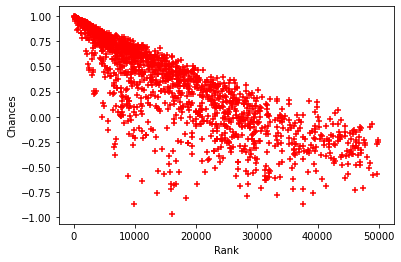

In [ ]:
plt.xlabel('Rank')
plt.ylabel('Chances')
plt.scatter(df.Rank,df.Chances,color='red',marker='+')

Applying One-Hot Encoding

In [ ]:
df1 = df.copy()

In [ ]:
cat=['Gender','Branch','College']

In [ ]:
df1=pd.get_dummies(df1,columns=cat)

In [ ]:
df1.shape

(1525, 57)

In [ ]:
X = df1.drop(['Opening Rank','Closing Rank','Chances','Quota','Type'],axis='columns')
X

,Rank,Gender_Female-only (including Supernumerary),Gender_Gender-Neutral,"Branch_Artificial Intelligence and Data Science (4 Years, Bachelor of Technology)","Branch_B. Tech. Computer Science and Engineering and M. Tech. Computer Science and Engineering with specialization in Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Branch_B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in Communication Systems Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Branch_B. Tech. Electronics and Communication Engineering and M. Tech. Electronics and Communication Engineering with specialization in VLSI Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Branch_B. Tech. Mechanical Engineering and M. Tech. Mechanical Engineering with specialization in Advanced Manufacturing (5 Years, Bachelor and Master of Technology (Dual Degree))","Branch_B. Tech. Mechanical Engineering and M. Tech. in Mechanical Engineering with specialization in Product Design (5 Years, Bachelor and Master of Technology (Dual Degree))","Branch_Computer Engineering (4 Years, Bachelor of Technology)","Branch_Computer Science (4 Years, Bachelor of Technology)","Branch_Computer Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Branch_Computer Science and Engineering (4 Years, Bachelor of Technology)","Branch_Computer Science and Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))","Branch_Data Science and Artificial Intelligence (4 Years, Bachelor of Technology)","Branch_Electronics and Communication Engineering (4 Years, Bachelor of Technology)","Branch_Electronics and Communication Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Branch_Information Technology (4 Years, Bachelor of Technology)","Branch_Information Technology-Business Informatics (4 Years, Bachelor of Technology)","Branch_Integrated B. Tech.(IT) and M. Tech (IT) (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Branch_Integrated B. Tech.(IT) and MBA (5 Years, Integrated B. Tech. and M. Tech. /MBA)","Branch_Mechanical Engineering (4 Years, Bachelor of Technology)","Branch_Mechanical Engineering with specialization in Design and Manufacturing (4 Years, Bachelor of Technology)","Branch_Mechanical Engineering with specialization in Smart Manufacturing (4 Years, Bachelor of Technology)","Branch_Mechatronics Engineering (4 Years, Bachelor of Technology)","Branch_Smart Manufacturing (4 Years, Bachelor of Technology)",College_Atal Bihari Vajpayee Indian Institute of Information Technology & Management Gwalior,College_Indian Institute of Information Technology (IIIT) Nagpur,College_Indian Institute of Information Technology (IIIT) Pune,College_Indian Institute of Information Technology (IIIT) Ranchi,"College_Indian Institute of Information Technology (IIIT), Sri City, Chittoor","College_Indian Institute of Information Technology (IIIT)Kota, Rajasthan",College_Indian Institute of Information Technology Bhagalpur,College_Indian Institute of Information Technology Bhopal,"College_Indian Institute of Information Technology Design & Manufacturing Kurnool, Andhra Pradesh",College_Indian Institute of Information Technology Guwahati,College_Indian Institute of Information Technology Lucknow,College_Indian Institute of Information Technology Manipur,"College_Indian Institute of Information Technology Srirangam, Tiruchirappalli",College_Indian Institute of Information Technology Surat,College_Indian Institute of Information Technology(IIIT) Dharwad,"College_Indian Institute of Information Technology(IIIT) Kalyani, West Bengal","College_Indian Institute of Information Technology(IIIT) Kilohrad, Sonepat, Haryana",College_Indian Institute of Information Technology(IIIT) Kottayam,"College_Indian Institute of Information Technology(IIIT) Una, Himachal Pradesh","College_Indian Institute of Information Technolo

In [ ]:
Y=df['Chances']
Y

0       0.955294
1       0.899797
2       0.843325
3       0.836796
4       0.792535
          ...   
1520    0.985251
1521    0.985486
1522    0.985579
1523    0.993340
1524    0.995691
Name: Chances, Length: 1525, dtype: float64

In [ ]:
#splitting the data into training and testing sets
trainx,testx,trainy,testy=train_test_split(X,Y,test_size=0.80)

Linear Regression

In [ ]:
r1=LinearRegression()
r1.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_score(testy,r1.predict(testx))

0.8323384942728594

In [ ]:
score= mean_absolute_error(testy,r1.predict(testx))
score

0.12830369038190423

In [ ]:
score= mean_squared_error(testy,r1.predict(testx))
score

0.03125298923160013

In [ ]:
score= mean_squared_error(testy,r1.predict(testx))
np.sqrt(score) # root mean square error

0.1767851499181991

Ridge Regression

In [ ]:
r=RidgeCV()
r.fit(trainx,trainy)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [ ]:
r2_score(testy,r.predict(testx))

0.8288025999081061

In [ ]:
score= mean_absolute_error(testy,r.predict(testx))
score

0.1279920761938072

In [ ]:
score= mean_squared_error(testy,r.predict(testx))
score

0.0319120985961883

In [ ]:
score= mean_squared_error(testy,r.predict(testx))
np.sqrt(score) # root mean square error

0.17863957735112423

Support Vector Regression

In [ ]:
r2= SVR()
r2.fit(trainx,trainy)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
r2_score(testy,r2.predict(testx))

0.6678865539232475

In [ ]:
score= mean_absolute_error(testy,r2.predict(testx))
score

0.1680992083794245

In [ ]:
score= mean_squared_error(testy,r2.predict(testx))
score

0.0619076985435074

In [ ]:
score= mean_squared_error(testy,r2.predict(testx))
np.sqrt(score) # root mean square error

0.24881257714092228

Decision Tree Regression

In [ ]:
r3= DecisionTreeRegressor()
r3.fit(trainx, trainy)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
r2_score(testy,r3.predict(testx))

0.6436281672054188

In [ ]:
score= mean_absolute_error(testy,r3.predict(testx))
score

0.1580490347635246

In [ ]:
score= mean_squared_error(testy,r3.predict(testx))
score

0.0664295898123484

In [ ]:
score= mean_squared_error(testy,r3.predict(testx))
np.sqrt(score) # root mean square error

0.25773938351045306